<a href="https://colab.research.google.com/github/RKResident/Marathas-Takneek-P-Club-Submissions/blob/main/sabyasachi_choudhury_250938_pclub_ml1_ps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [63]:
# Separating numerical and categorical data
# numerical data will simply be normalized between 0 and 1
# categorical data will be split into new columns, each with only 1 or 0 corresponding to unique values within each categ. class
categorical = ["symboling", "CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation",
               "fuelsystem"]
numerical = ["wheelbase", "carlength", "enginesize", "boreratio", "stroke", "horsepower", "compressionratio", "peakrpm", "citympg", "highwaympg", "price"]

In [64]:
# basic loading and preprocessing
df = pd.read_csv("/content/CarPrice_Assignment.csv")
for i, elem in enumerate(df.CarName):
  df.loc[i, "CarName"] = elem.split(" ")[0]
df = df.drop("car_ID", axis=1)
df = df.dropna()
print(df)

     symboling      CarName fueltype aspiration doornumber      carbody  \
0            3  alfa-romero      gas        std        two  convertible   
1            3  alfa-romero      gas        std        two  convertible   
2            1  alfa-romero      gas        std        two    hatchback   
3            2         audi      gas        std       four        sedan   
4            2         audi      gas        std       four        sedan   
..         ...          ...      ...        ...        ...          ...   
200         -1        volvo      gas        std       four        sedan   
201         -1        volvo      gas      turbo       four        sedan   
202         -1        volvo      gas        std       four        sedan   
203         -1        volvo   diesel      turbo       four        sedan   
204         -1        volvo      gas      turbo       four        sedan   

    drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0          rwd          fro

In [66]:
# normalize numerical columns and split categorical ones

fin_df = pd.DataFrame()
categorical_labels = {}
for col in df.columns:
  if col in categorical:
    categorical_labels[col] = {}
    for i, elem in enumerate(df[col]):
      if elem not in categorical_labels[col]:
        categorical_labels[col][elem] = len(categorical_labels[col]) + 1
        fin_df[f"{col}_{categorical_labels[col][elem]}"] = [1 if j == elem else 0 for j in df[col]];

  elif col in numerical:
    fin_df[col] = (df[col] - min(df[col]))/(max(df[col] - min(df[col])))

print(fin_df)

     symboling_1  symboling_2  symboling_3  symboling_4  symboling_5  \
0              1            0            0            0            0   
1              1            0            0            0            0   
2              0            1            0            0            0   
3              0            0            1            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
200            0            0            0            0            1   
201            0            0            0            0            1   
202            0            0            0            0            1   
203            0            0            0            0            1   
204            0            0            0            0            1   

     symboling_6  CarName_1  CarName_2  CarName_3  CarName_4  ...  \
0              0          1          0          0          0  ... 

In [67]:
print(fin_df.columns)

Index(['symboling_1', 'symboling_2', 'symboling_3', 'symboling_4',
       'symboling_5', 'symboling_6', 'CarName_1', 'CarName_2', 'CarName_3',
       'CarName_4', 'CarName_5', 'CarName_6', 'CarName_7', 'CarName_8',
       'CarName_9', 'CarName_10', 'CarName_11', 'CarName_12', 'CarName_13',
       'CarName_14', 'CarName_15', 'CarName_16', 'CarName_17', 'CarName_18',
       'CarName_19', 'CarName_20', 'CarName_21', 'CarName_22', 'CarName_23',
       'CarName_24', 'CarName_25', 'CarName_26', 'CarName_27', 'CarName_28',
       'fueltype_1', 'fueltype_2', 'aspiration_1', 'aspiration_2',
       'doornumber_1', 'doornumber_2', 'carbody_1', 'carbody_2', 'carbody_3',
       'carbody_4', 'carbody_5', 'drivewheel_1', 'drivewheel_2',
       'drivewheel_3', 'enginelocation_1', 'enginelocation_2', 'wheelbase',
       'carlength', 'enginesize', 'fuelsystem_1', 'fuelsystem_2',
       'fuelsystem_3', 'fuelsystem_4', 'fuelsystem_5', 'fuelsystem_6',
       'fuelsystem_7', 'fuelsystem_8', 'boreratio', 'st

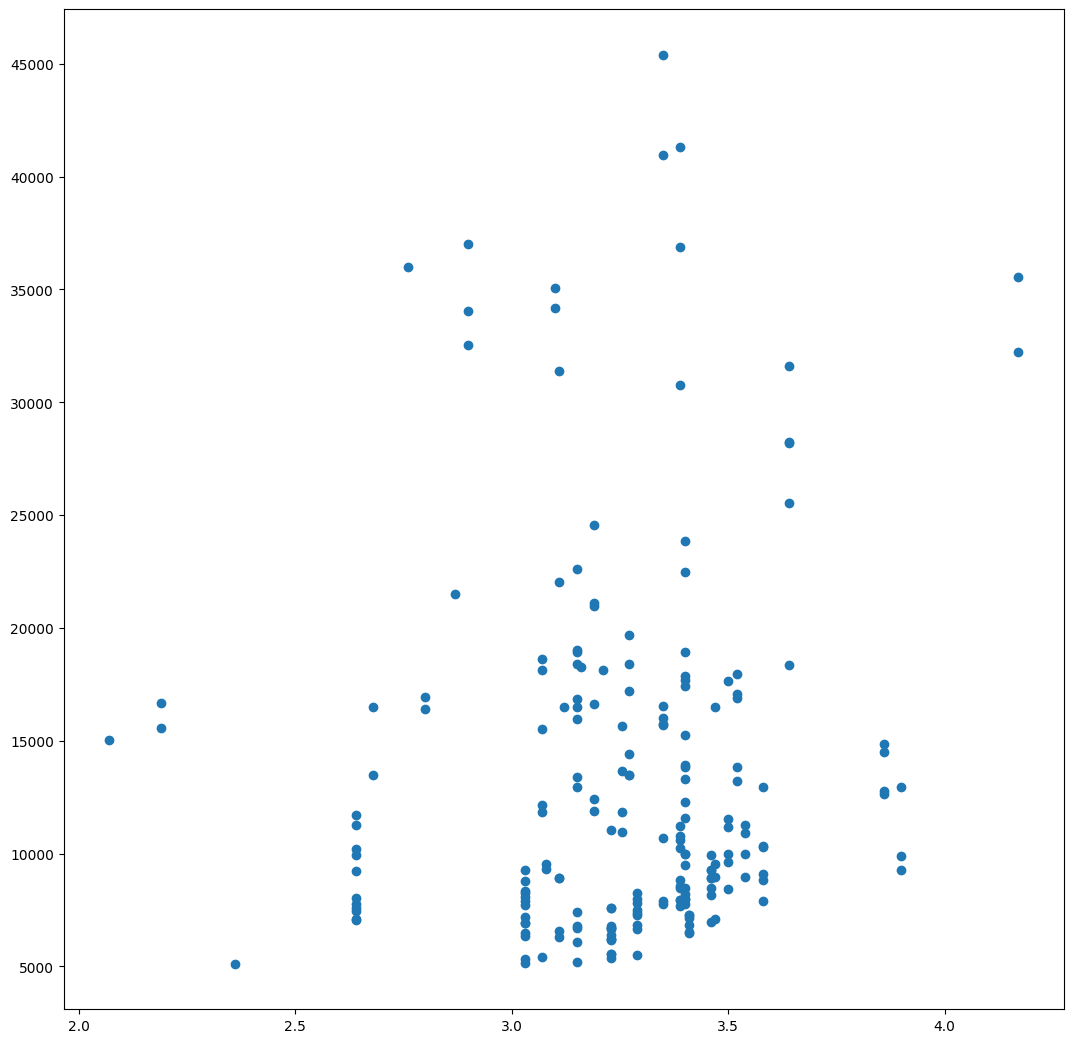

In [69]:
# testing area to see correlation of different features with price
fig = plt.figure(1, figsize=(10, 10))
fig.add_axes((0, 0, 1, 1))
ax = fig.get_axes()[0]
ax.scatter(df.stroke, df.price)

In [86]:
# Model implementation
class LinearRegression:
    def __init__(self, params):
      # Initializing weights and biases. A linear regressor uses one weight and
      # one bias for each distinct feature
        self.weights = np.random.normal(size=params)
        self.bias = np.random.random()*5
        self.loss_tape = []
        self.loss = 0

    # Loss function
    def mse_loss(self, y_pred: np.array, y_true: np.array, add=True):
        self.loss = np.mean((y_pred - y_true)**2)
        if add:
            self.loss_tape.append(self.loss)

    # Prediction function
    def predict(self, x_input):
        return np.sum(self.weights * x_input, axis=1) + self.bias

    # Critical step to training: updating the weights after training each batch
    # At each iteration, the model predicts the outputs of a batch, calculates the
    # loss derivative, and then 'goes down the slope' in the direction that
    # minimzes the loss
    #
    # Function appears complicated due to the need to ensure proper shapes for
    # every numpy array involved
    def update(self, x_input: np.array, y_pred, y_true, batch_size, lr):
        weight_slope_matrix = 2*(y_pred-y_true)*(x_input.transpose())
        weight_slope_matrix = np.sum(weight_slope_matrix, axis=1)/batch_size
        bias_slope = np.sum(2*(y_pred-y_true))/batch_size
        # The above two steps calculate derivative of the weight and bias numerically
        # However, we don't calculate the slope for EACH sample being used.
        # Rather, we take a batch of samples, calculate their slopes, and then
        # Update everything based on the average calculated slope
        # This is why we divide by the batch size. This provides better
        # gradient descent
        self.weights -= weight_slope_matrix*lr
        self.bias -= bias_slope * lr

    # Epochs is number of times to loop over entire DS
    # Batch size is number of sample points we use to make one step
    # Learning rate (lr) is how far each step down the slope is
    def train(self, x_input, y_true, epochs:int, batch_size:int, lr:float):
        # Just the training loop which goes through all the batches iteratively
        # updating at each step, and recording the loss for visualization purposes
        for i in range(epochs):
            indices = list(np.random.permutation(range(len(x_input))))
            batch_indices = np.array([indices[batch_size*k: batch_size*(k+1)] for k in range(len(x_input)//batch_size)])
            batches_x = x_input[batch_indices]
            batches_y = y_true[batch_indices]

            for j in range(len(batches_x)):
                try:
                  y_pred = self.predict(batches_x[i])
                  self.mse_loss(y_pred, batches_y[i])
                  self.update(batches_x[i], y_pred, batches_y[i], batch_size, lr)
                except:
                  pass

        # The final result of a linear regressor is just its weights and biases
        # as those are enuf to make future predictions
        return self.weights, self.bias, self.loss_tape

    # Function to shorthand validation
    def test(self, x_validation, y_validation):
        predictions = self.predict(x_validation)
        self.mse_loss(predictions, y_validation, add=False)
        print(self.loss)

In [71]:
print(fin_df)

     symboling_1  symboling_2  symboling_3  symboling_4  symboling_5  \
0              1            0            0            0            0   
1              1            0            0            0            0   
2              0            1            0            0            0   
3              0            0            1            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
200            0            0            0            0            1   
201            0            0            0            0            1   
202            0            0            0            0            1   
203            0            0            0            0            1   
204            0            0            0            0            1   

     symboling_6  CarName_1  CarName_2  CarName_3  CarName_4  ...  \
0              0          1          0          0          0  ... 

In [77]:
print(fin_df.columns)

Index(['symboling_1', 'symboling_2', 'symboling_3', 'symboling_4',
       'symboling_5', 'symboling_6', 'CarName_1', 'CarName_2', 'CarName_3',
       'CarName_4', 'CarName_5', 'CarName_6', 'CarName_7', 'CarName_8',
       'CarName_9', 'CarName_10', 'CarName_11', 'CarName_12', 'CarName_13',
       'CarName_14', 'CarName_15', 'CarName_16', 'CarName_17', 'CarName_18',
       'CarName_19', 'CarName_20', 'CarName_21', 'CarName_22', 'CarName_23',
       'CarName_24', 'CarName_25', 'CarName_26', 'CarName_27', 'CarName_28',
       'fueltype_1', 'fueltype_2', 'aspiration_1', 'aspiration_2',
       'doornumber_1', 'doornumber_2', 'carbody_1', 'carbody_2', 'carbody_3',
       'carbody_4', 'carbody_5', 'drivewheel_1', 'drivewheel_2',
       'drivewheel_3', 'enginelocation_1', 'enginelocation_2', 'wheelbase',
       'carlength', 'enginesize', 'fuelsystem_1', 'fuelsystem_2',
       'fuelsystem_3', 'fuelsystem_4', 'fuelsystem_5', 'fuelsystem_6',
       'fuelsystem_7', 'fuelsystem_8', 'boreratio', 'st

In [108]:
# training
model = LinearRegression(len(fin_df).columns - 1)
indices = np.random.permutation(205)
train_indices, test_indices = indices[:-15], indices[-15:]
x_train, y_train = fin_df[fin_df.columns[:-1]].to_numpy()[train_indices], fin_df.price.to_numpy()[train_indices]
x_test, y_test = fin_df[fin_df.columns[:-1]].to_numpy()[test_indices], fin_df.price.to_numpy()[test_indices]
a = model.train(x_train, y_train, 15000, 1, 0.001)

In [109]:
model.test(x_test, y_test)

0.4438411467260641


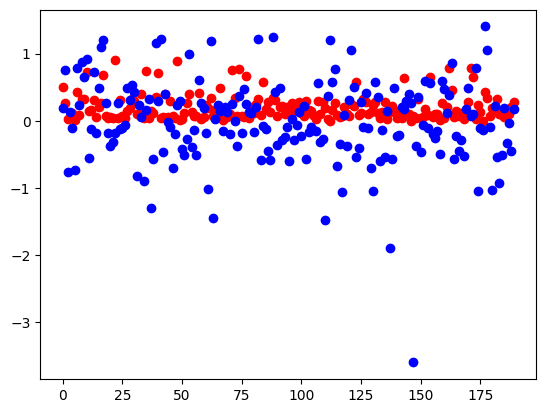

In [111]:
plt.scatter(range(len(y_train)), y_train, color="red")
plt.scatter(range(len(y_train)), model.predict(x_train), color="blue")

Clearly, model is pretty pathetic, probably due to the very large number of features (68), and non linear correlation between features and price

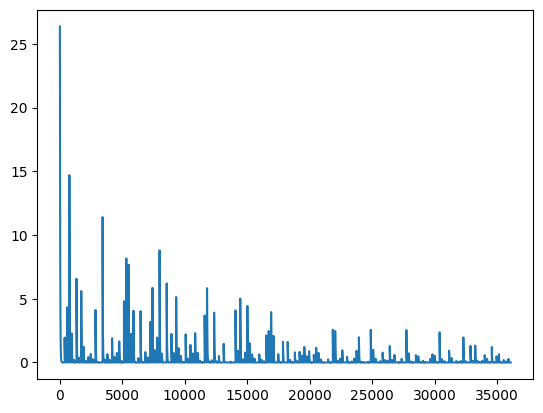

In [110]:
# Graph of loss with epochs
plt.plot(model.loss_tape)